# Training a CNN with MNIST (Keras)

## Environment Setup

In [1]:
#import needed modules

import sklearn
import tensorflow as tf
import keras
import numpy as np
np.random.seed(123) #for reproductibility

In [2]:
#check that the available versions of the modules are modern enough

from distutils.version import StrictVersion
assert(StrictVersion(sklearn.__version__) >= StrictVersion('0.18.1')) #if error: pip install scikit-learn matplotlib
assert(StrictVersion(tf.__version__) >= StrictVersion('1.0.0')) #if error: pip install tensorflow
assert(StrictVersion(keras.__version__) >= StrictVersion('1.2.2')) #if erro: pip install keras

In [7]:
#import specific components from Keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

## Data loading

In [39]:
# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [68]:
#dimensions of the training and test datasets
print(x_train.shape[0], 'training samples. x, y  = ', x_train.shape, y_train.shape)
print(x_test.shape[0], 'test samples. x, y = ', x_test.shape, y_test.shape)

60000 training samples. x, y  =  (60000, 28, 28) (60000,)
10000 test samples. x, y =  (10000, 28, 28) (10000,)


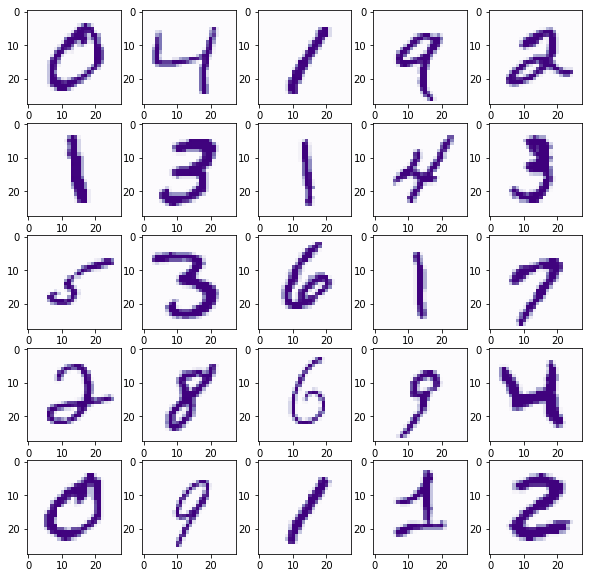

In [60]:
#show a few images from the dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
rows = 5
cols = 5
for i in range(1,rows+1):
    for j in range(1,cols+1):    
        axis = fig.add_subplot(rows,cols,rows*(i-1)+j)
        axis.imshow(x_train[rows*(i-1)+j], cmap='Purples')

## Hyperpaprameters

In [11]:
batch_size = 128
num_classes = 10
epochs = 12

## Data preprocess

In [69]:
#image dimensions
img_rows, img_cols = 28, 28

#just formatting for the image arrays. Keras expects images as 3D arrays, even if they are grayscale.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#normalizing image data to values between [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

# convert digits in category vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)


## Defining the architecture

In [13]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Convolution2D(64, (3, 3), activation='relu')) #conv layer with 64 filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) #flattens input to connect it to the next layer
model.add(Dense(128, activation='relu')) #fully connected NN with 128 neurons
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #softmax activation converts scores to probabilities

## Building the network

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Training

In [15]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#12 epoch cpu-only training should take around ~40 minutes runnning on jupyter

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 181s - loss: 0.3476 - acc: 0.8953 - val_loss: 0.0757 - val_acc: 0.9766
Epoch 2/12
60000/60000 [==============================] - 188s - loss: 0.1118 - acc: 0.9668 - val_loss: 0.0517 - val_acc: 0.9836
Epoch 3/12
60000/60000 [==============================] - 187s - loss: 0.0870 - acc: 0.9745 - val_loss: 0.0419 - val_acc: 0.9864
Epoch 4/12
60000/60000 [==============================] - 187s - loss: 0.0724 - acc: 0.9779 - val_loss: 0.0367 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 185s - loss: 0.0613 - acc: 0.9817 - val_loss: 0.0381 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 186s - loss: 0.0546 - acc: 0.9835 - val_loss: 0.0351 - val_acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 184s - loss: 0.0505 - acc: 0.9851 - val_loss: 0.0322 - val_acc: 0.9895
Epoch 8/12
60000/60000 [=======================

## Test / Evaluation

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])